# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [56]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [57]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [119]:
df_raw.shape

(400, 4)

 Answer: 1600

#### Question 2. Create a summary table

In [59]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [111]:
df_wash.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The domain of GRE is from 200-800, while the scale of GPA is from 0-4. Standard deviation is a ratio of the domain that corresponds to the distribution of results contained within that domain, so it should grow larger as the domain increases. GRE has 120 times as many units as GPA, so it follows that it would be about 2 orders of magnitude greater. In our dataset, this also means that the distribution of GPA scores are closer together than those of the GRE scores, most likely indicating higher kurtosis of GPA vs. admission.

#### Question 4. Drop data points with missing data


In [160]:
df_wash=df_raw.dropna()
df_wash.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: compare the length of the dataframe to the count of the objects of each column.

In [124]:
df_wash.shape

(397, 4)

In [123]:
len(df_wash)==df_wash.count()

admit       True
gre         True
gpa         True
prestige    True
dtype: bool

In [125]:
len(df_raw)==df_raw.count()

admit        True
gre         False
gpa         False
prestige    False
dtype: bool

#### Question 6. Create box plots for GRE and GPA

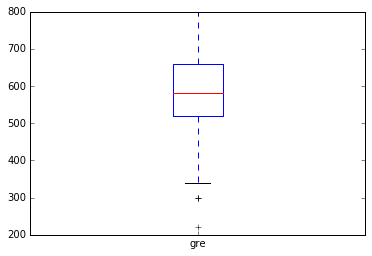

In [136]:
df_wash['gre'].plot(kind="box")

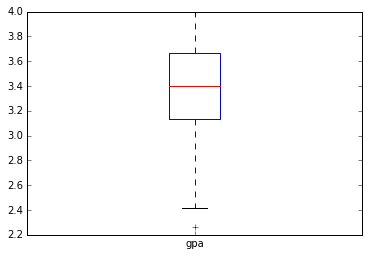

In [137]:
df_wash['gpa'].plot(kind="box")

#### Question 7. What do these plots show?

Answer: GRE: This plot shows the total range of scores is between about 350-800, with the middle 50% of scores between about 500-650. The mean is a little below 600. It also shows an outlier near 300.
GPA: This plot shows the range of GPAs between about 2.4 and 4.0 with an outlier at about 2.25. The second and third quartiles are from about 3.2-3.6. The mean is close to 3.4

#### Question 8. Describe each distribution 

In [140]:
df_wash['gre'].describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [141]:
df_wash['gpa'].describe()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: They both seem to be skewed slightly negatively. In GRE, the difference in scores for the quartiles are 300, 60, 80, and 140, from first to last. For GPA, the first quartile contains 0.87 of a difference in scores, while the second, third and fourth are 0.27, 0.27, and 0.33 respectively. This would represent a mean shifted to the right, grphically, with a lower kurtosis for GRE than GPA.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, the data may be slightly skewed negatively for gpa and gre, and a linear regression model would be slightly off for predictive purposes. It would show that higher scores would be necessary for admission.

#### Question 11. Which of our variables are potentially colinear? 

In [159]:
df_wash.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA have the highest correlation values of 0.38

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create four bins for each prestige ranked 1-4, and create new data frames for each. Create summary tables for each and examine the mean, standard deviation, and distribution. Create four boxplots side-by-side to represent this graphically. Finally, examine correlation in each bin between 'admit' and 'prestige' for any trends.

#### Question 14. What is your hypothesis? 

Answer: As prestige of school increases, the probability of acceptance will increase, across all gpa and gre scores.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Missing data can be filled either by assigning an object to each container, or by using .fillna( ) to input a value for each of the missing points. This is not optimal, however, because the input data would be completely arbitrary. Better would be to use _x_.fillna(_x_.mean( )) in order to input a value that has some relevance to the data set. However the best option would be to use interpolation. By using .interpolate( ), an approximation for the missing data can be created from a linear model of the rest of the data. Other options exist like cubic and quadratic approximations also. 

#### 2. Bonus: Log transform the skewed data

In [177]:
df_log = np.log(df_wash[['gre','gpa']])
df_log.head()

,gre,gpa
0,5.940171,1.283708
1,6.492240,1.300192
2,6.684612,1.386294
3,6.461468,1.160021
4,6.253829,1.075002


#### 3. Advanced: Impute missing data

In [164]:
df_filled=df_raw.interpolate()
df_filled.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [165]:
df_filled.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64